In [1]:
import numpy as np
from scipy.fftpack import fftfreq
from scipy.ndimage import median_filter, gaussian_filter
import cv2
import tifffile as tf
import matplotlib.pyplot as plt


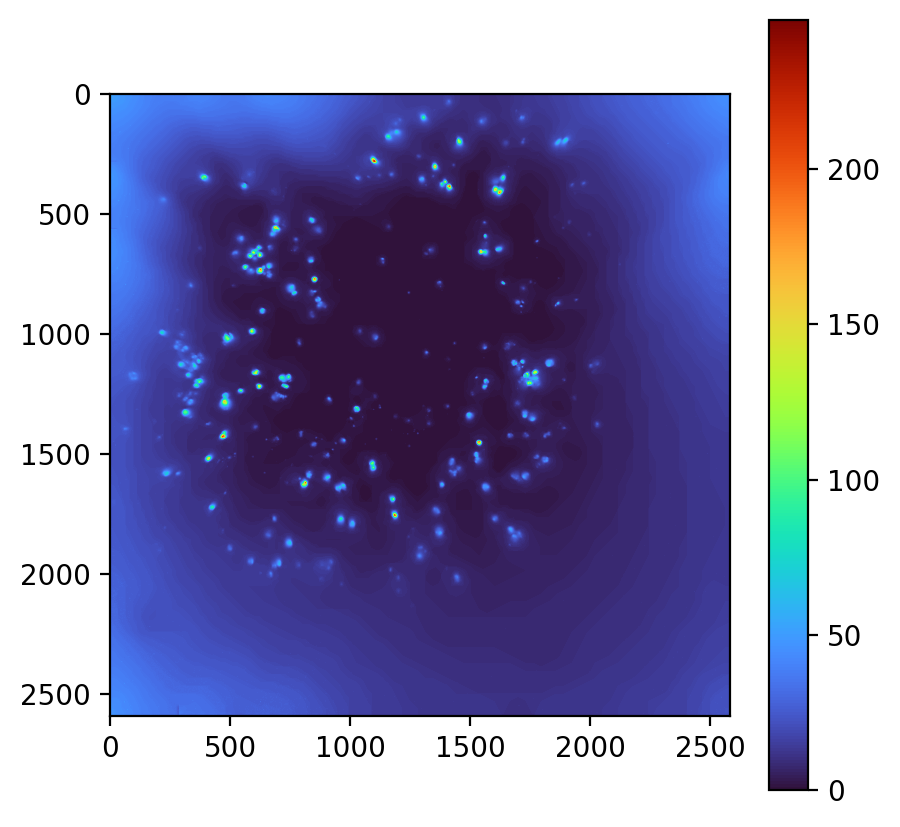

(2591, 2584)


In [2]:
image_1 = tf.imread(r'C:\Users\User\Github\openCLEM\scratch\stitched.tif')
plt.figure(dpi=200, figsize=(5,5))
plt.imshow(image_1, cmap='turbo')
plt.colorbar()
plt.show()
print(image_1.shape)

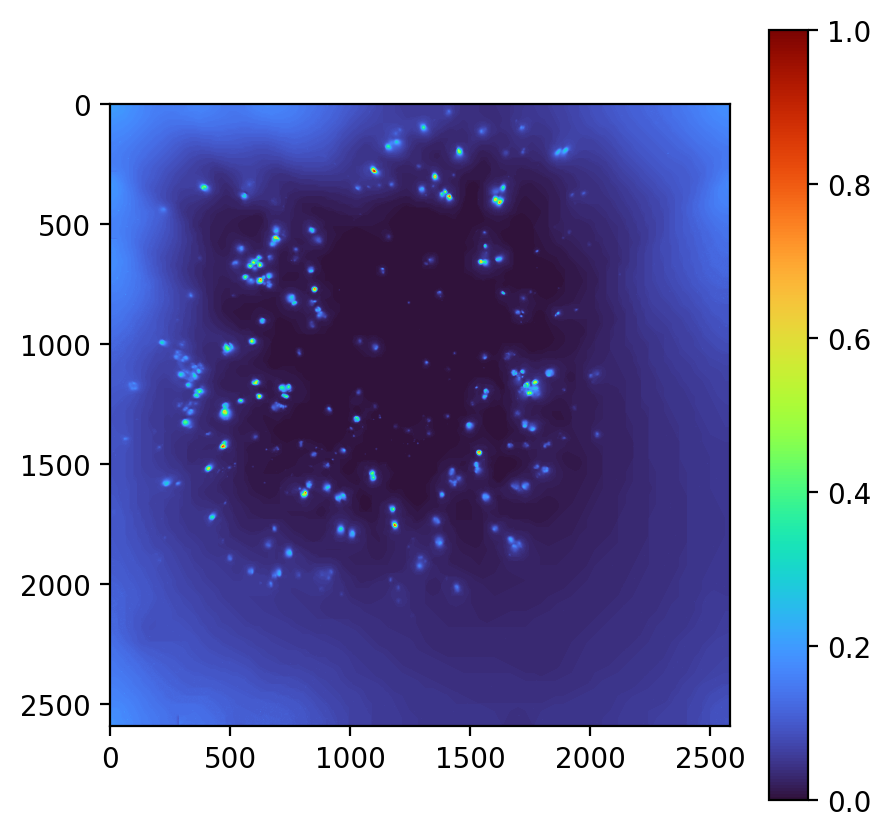

(2591, 2584)


In [22]:
image_1_normalised = tf.imread(r'C:\Users\User\Github\openCLEM\scratch\stitched.tif')
# normalise image from 0 to 1
image_1_normalised = (image_1_normalised - np.min(image_1_normalised)) / (np.max(image_1_normalised) - np.min(image_1_normalised))

plt.figure(dpi=200, figsize=(5,5))
plt.imshow(image_1_normalised, cmap='turbo')
plt.colorbar()
plt.show()
print(image_1.shape)

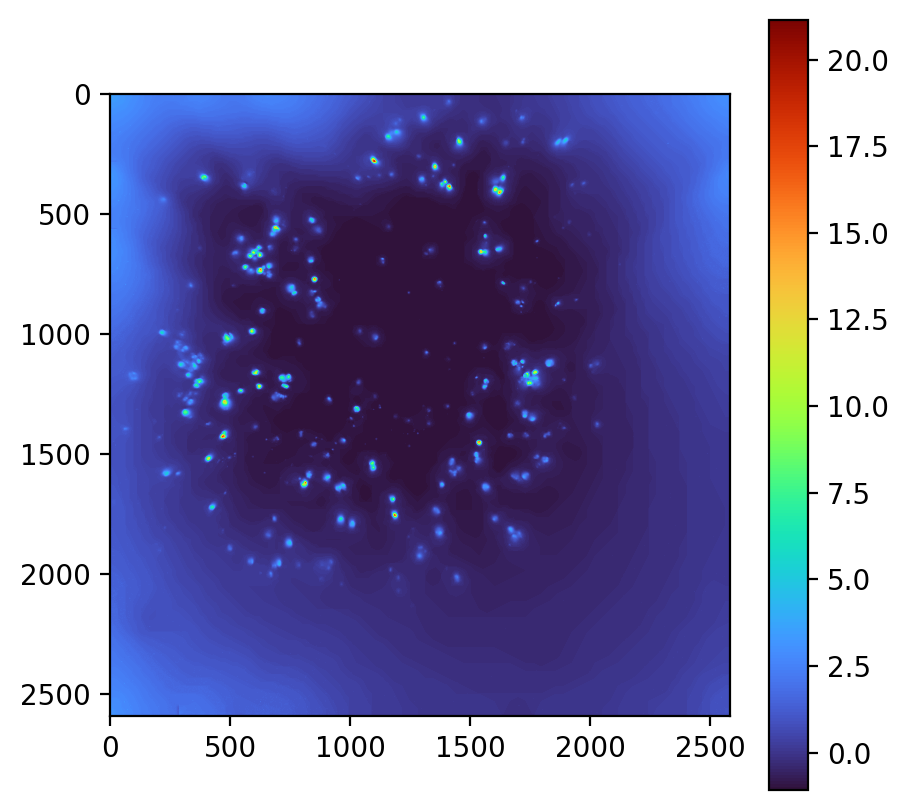

(2591, 2584)


In [34]:
image_1_normalised_2 = tf.imread(r'C:\Users\User\Github\openCLEM\scratch\stitched.tif')
# standardise image
image_1_normalised_2 = (image_1_normalised_2 - np.mean(image_1_normalised_2)) / np.std(image_1_normalised_2)

plt.figure(dpi=200, figsize=(5,5))
plt.imshow(image_1_normalised_2, cmap='turbo')
plt.colorbar()
plt.show()
print(image_1.shape)

In [3]:
pixel_size_lm = 325e-9
pixel_size_fib = 2.604166666666667e-07

In [4]:
image = tf.imread(r"C:\Users\User\Documents\15-06-23 - Cells\ib_1__5.tif").astype(np.float32)

In [5]:
realspace_lm = pixel_size_lm * image_1.shape[1]
realspace_fib = pixel_size_fib * image.shape[1]

In [6]:
print(realspace_lm)
print(realspace_fib)

0.0008398
0.0008


In [7]:
n_pixels = realspace_lm/pixel_size_fib
print(n_pixels)

3224.832


In [8]:
diff_lm = n_pixels - image_1.shape[1]
print(diff_lm)

640.8319999999999


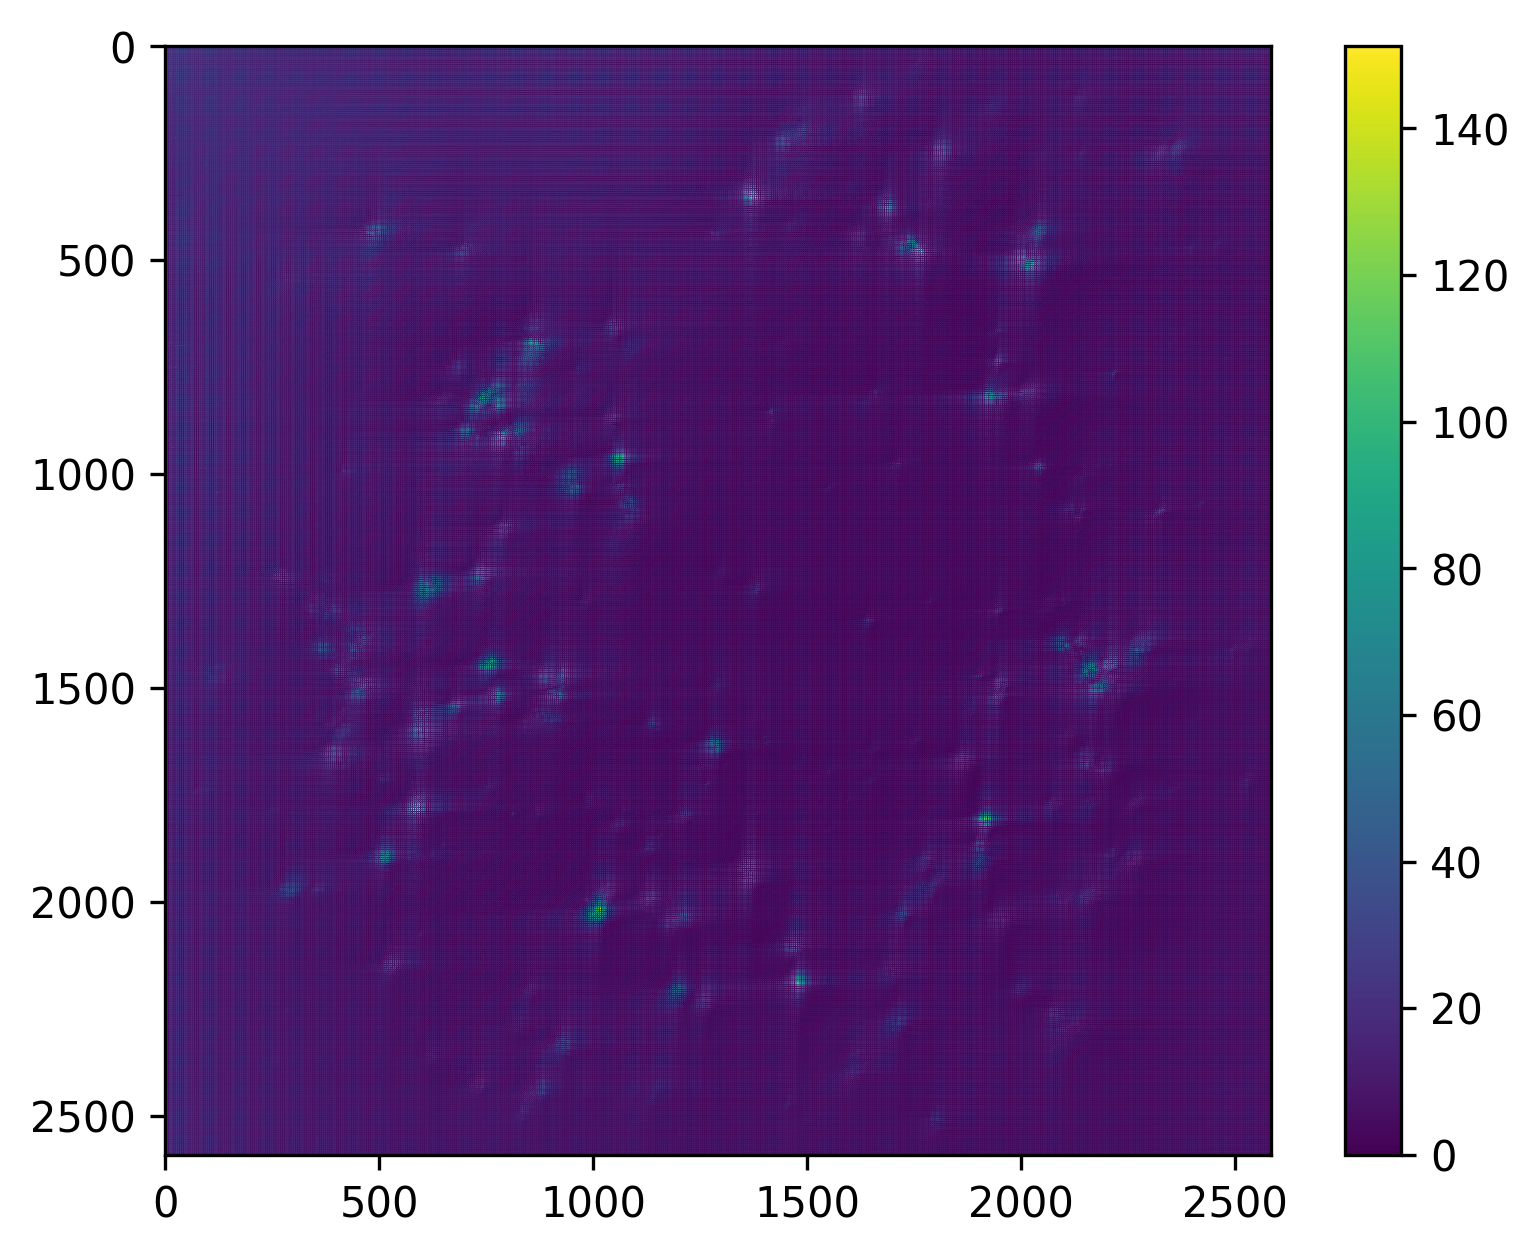

In [9]:

# Compute the 2D Fourier transform
fft = np.fft.fft2(image_1)
# Pad the Fourier transform
pad_rows = int(diff_lm/2)  # Double the number of rows
pad_cols = int(diff_lm/2)  # Double the number of columns
padded_fft = np.pad(fft, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)

# Perform the inverse Fourier transform
padded_image = np.fft.ifft2(padded_fft)

# Take the magnitude of the complex result
padded_image = np.abs(padded_image)

# Convert the result to uint8 for visualization
# padded_image = np.uint8(padded_image)
""
# Display the original image and the padded image
plt.figure(dpi=300)
plt.imshow(padded_image[0:image_1.shape[0], 0:image_1.shape[1]], interpolation="none")
plt.colorbar()
plt.show()


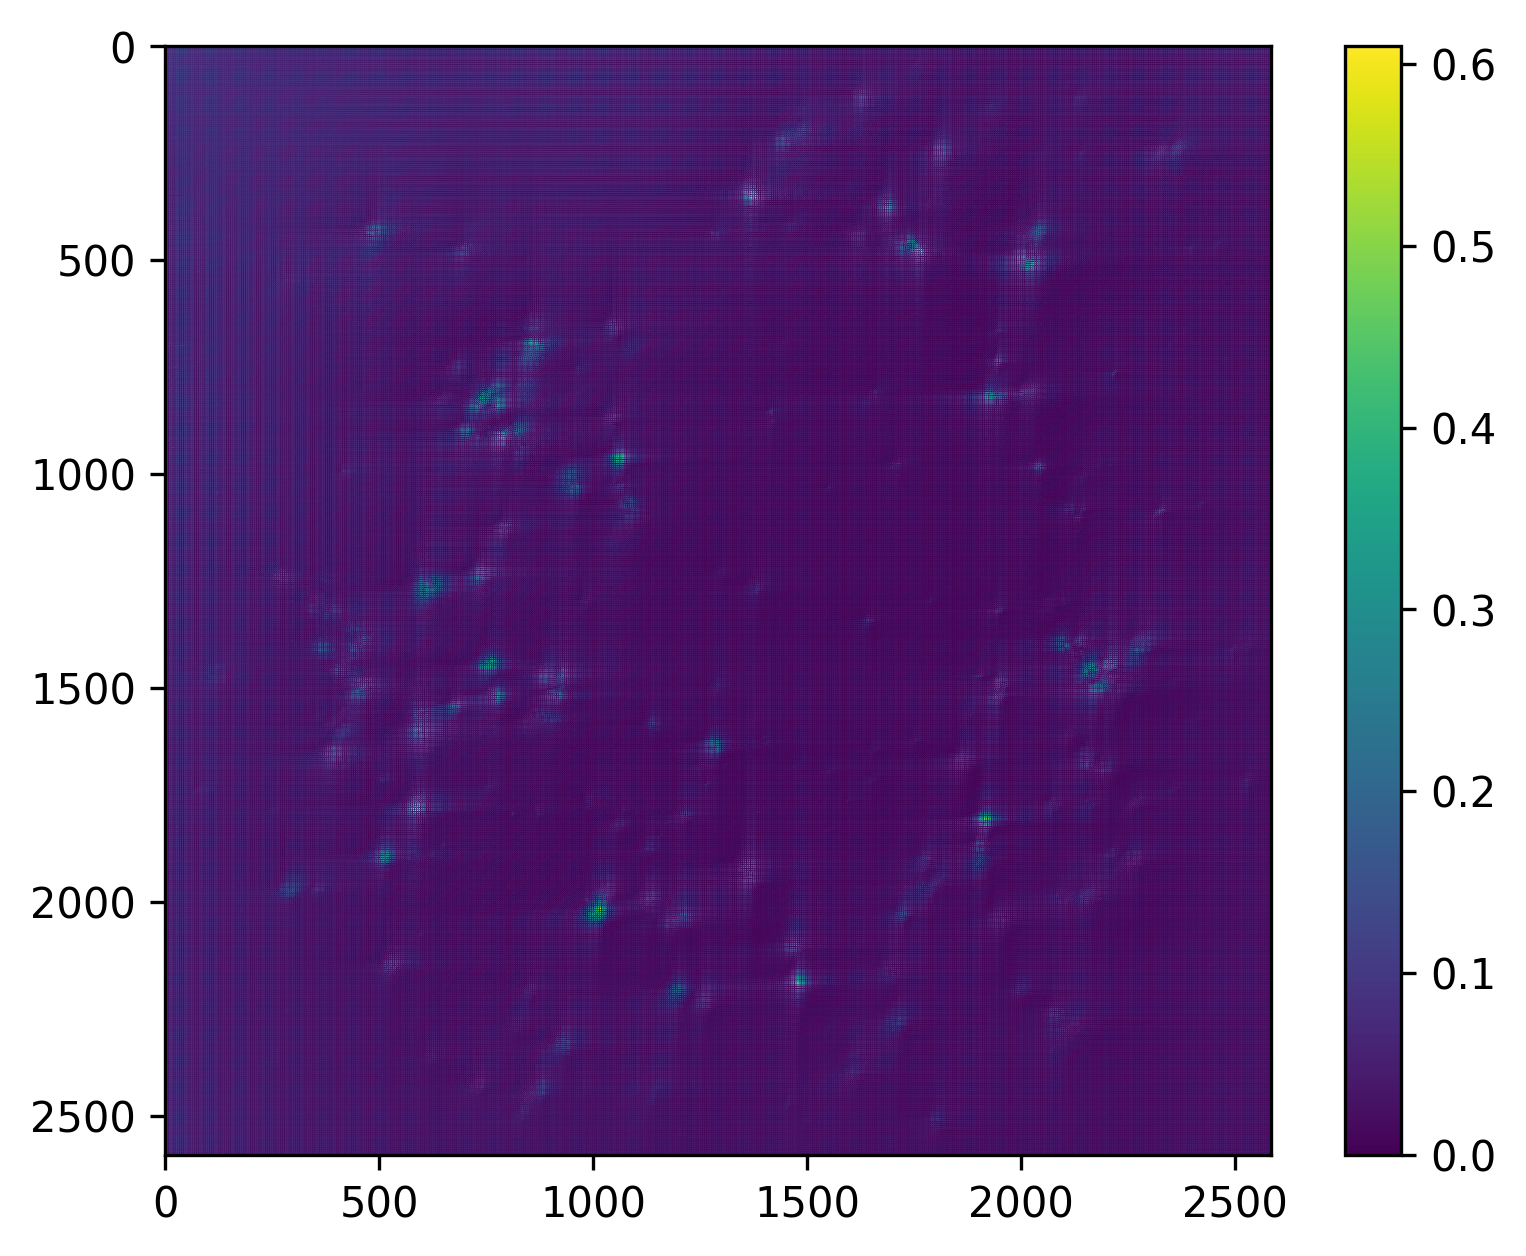

In [37]:

# Compute the 2D Fourier transform
fft = np.fft.fft2(image_1_normalised)
# Pad the Fourier transform
pad_rows = int(diff_lm/2)  # Double the number of rows
pad_cols = int(diff_lm/2)  # Double the number of columns
padded_fft = np.pad(fft, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)

# Perform the inverse Fourier transform
padded_image = np.fft.ifft2(padded_fft)

# Take the magnitude of the complex result
padded_image = np.abs(padded_image)

# Convert the result to uint8 for visualization
# padded_image = np.uint8(padded_image)
""
# Display the original image and the padded image
plt.figure(dpi=300)
plt.imshow(padded_image[0:image_1.shape[0], 0:image_1.shape[1]], interpolation="none")
plt.colorbar()

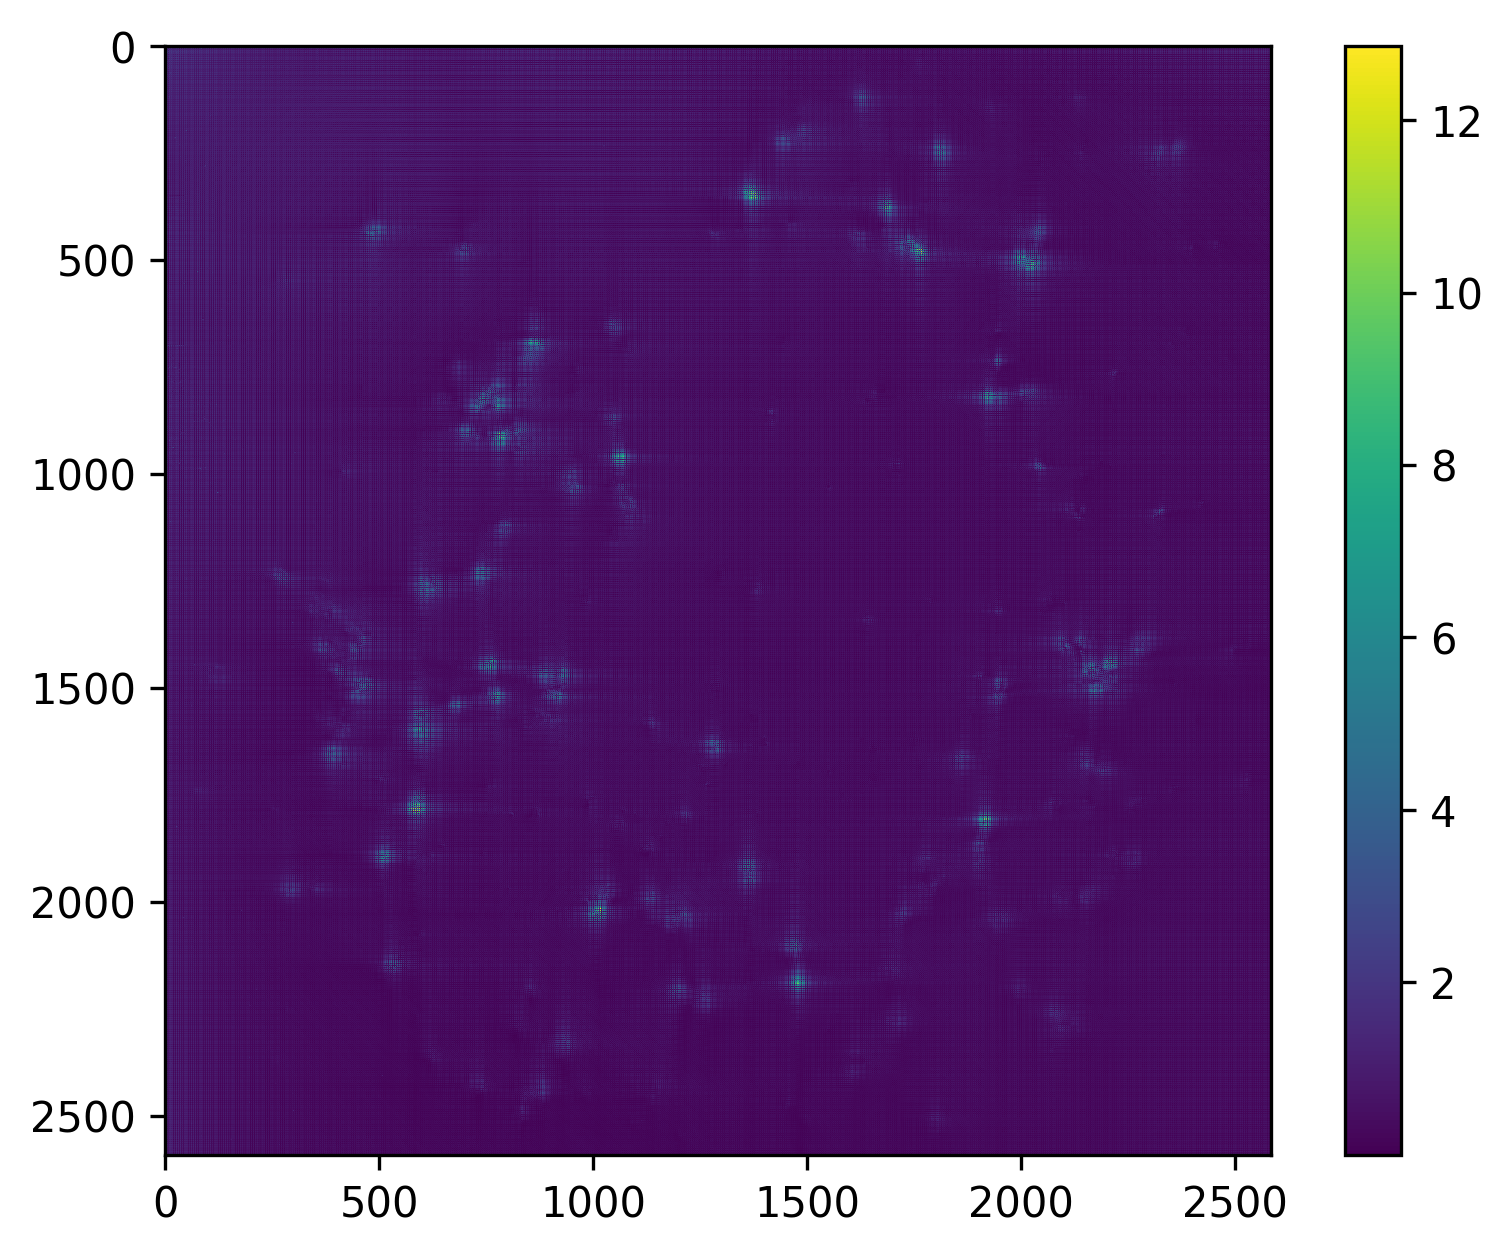

In [36]:

# Compute the 2D Fourier transform
fft = np.fft.fft2(image_1_normalised_2)
# Pad the Fourier transform
pad_rows = int(diff_lm/2)  # Double the number of rows
pad_cols = int(diff_lm/2)  # Double the number of columns
padded_fft = np.pad(fft, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)

# Perform the inverse Fourier transform
padded_image = np.fft.ifft2(padded_fft)

# Take the magnitude of the complex result
padded_image = np.abs(padded_image)

# Convert the result to uint8 for visualization
# padded_image = np.uint8(padded_image)
""
# Display the original image and the padded image
plt.figure(dpi=300)
plt.imshow(padded_image[0:image_1.shape[0], 0:image_1.shape[1]], interpolation="none")
plt.colorbar()

In [32]:
new_realspace_lm = padded_image.shape[1] * pixel_size_lm
new_pixel_size = realspace_lm / padded_image.shape[1]
print(new_realspace_lm)
print(realspace_lm)
print(realspace_fib)
print(new_pixel_size)

0.0010478
0.0008398
0.0008
2.6048387096774194e-07


In [33]:
print(pixel_size_fib)
print(pixel_size_lm)

2.604166666666667e-07
3.25e-07


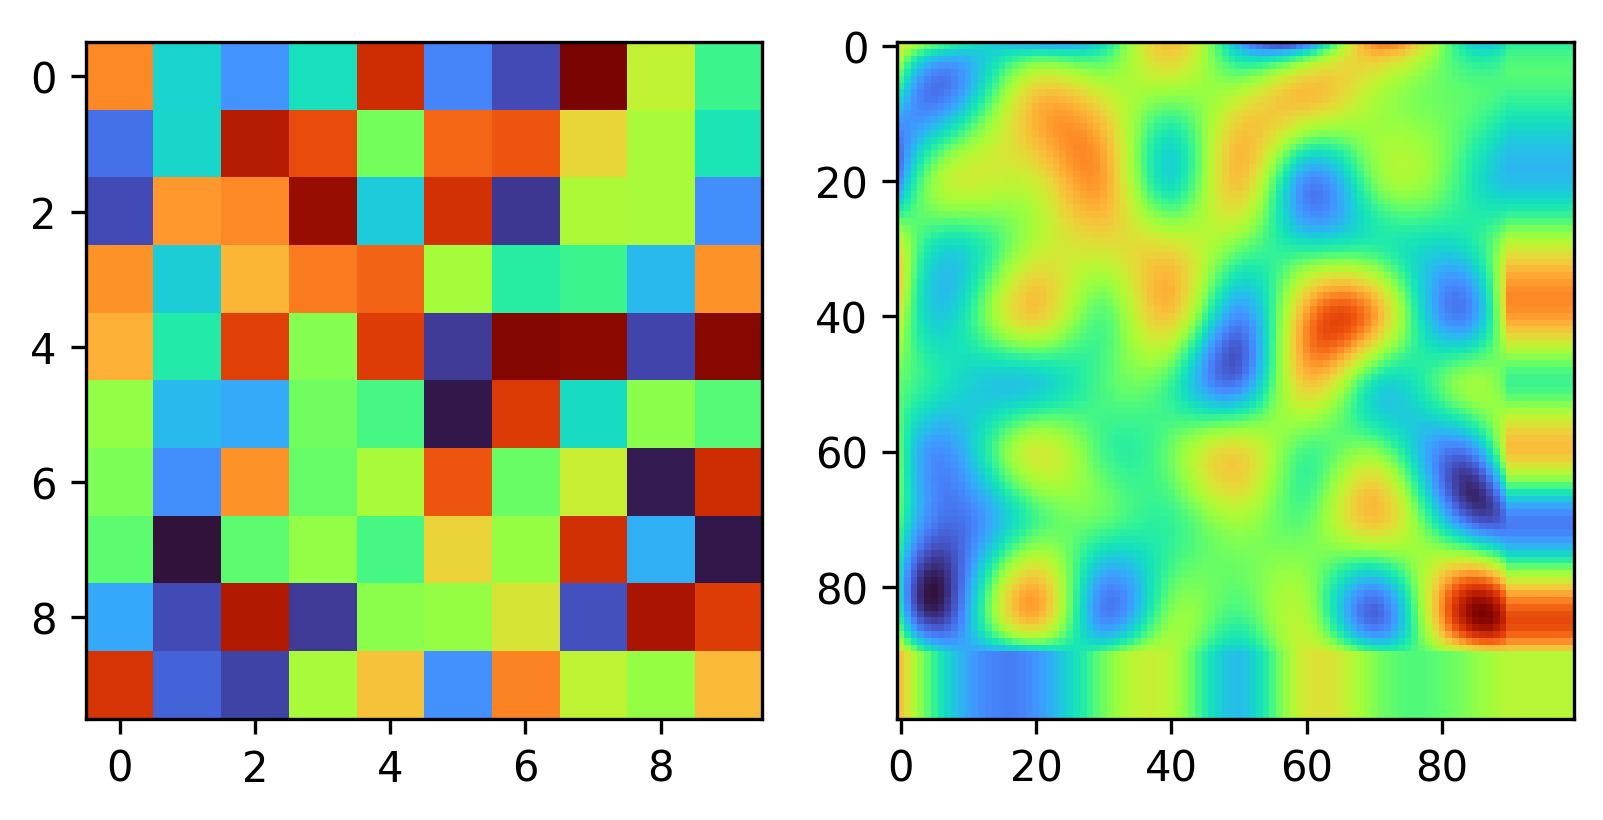

In [11]:
# I want to use Scipy to interpolate an image to have more pixels
# import package
from scipy import interpolate

# create a grid of points
x = np.arange(0, 10)

# create a random image
image = np.random.rand(10, 10)

# create interpolation function
f = interpolate.interp2d(x, x, image, kind='cubic')

# interpolate image to have 100x100 pixels
x_new = np.arange(0, 10, 0.1)
image_new = f(x_new, x_new)

# plot the original and interpolated image
plt.figure(dpi=300)
plt.subplot(121)

plt.imshow(image, cmap='turbo')

plt.subplot(122)
plt.imshow(image_new, cmap='turbo')
plt.show()


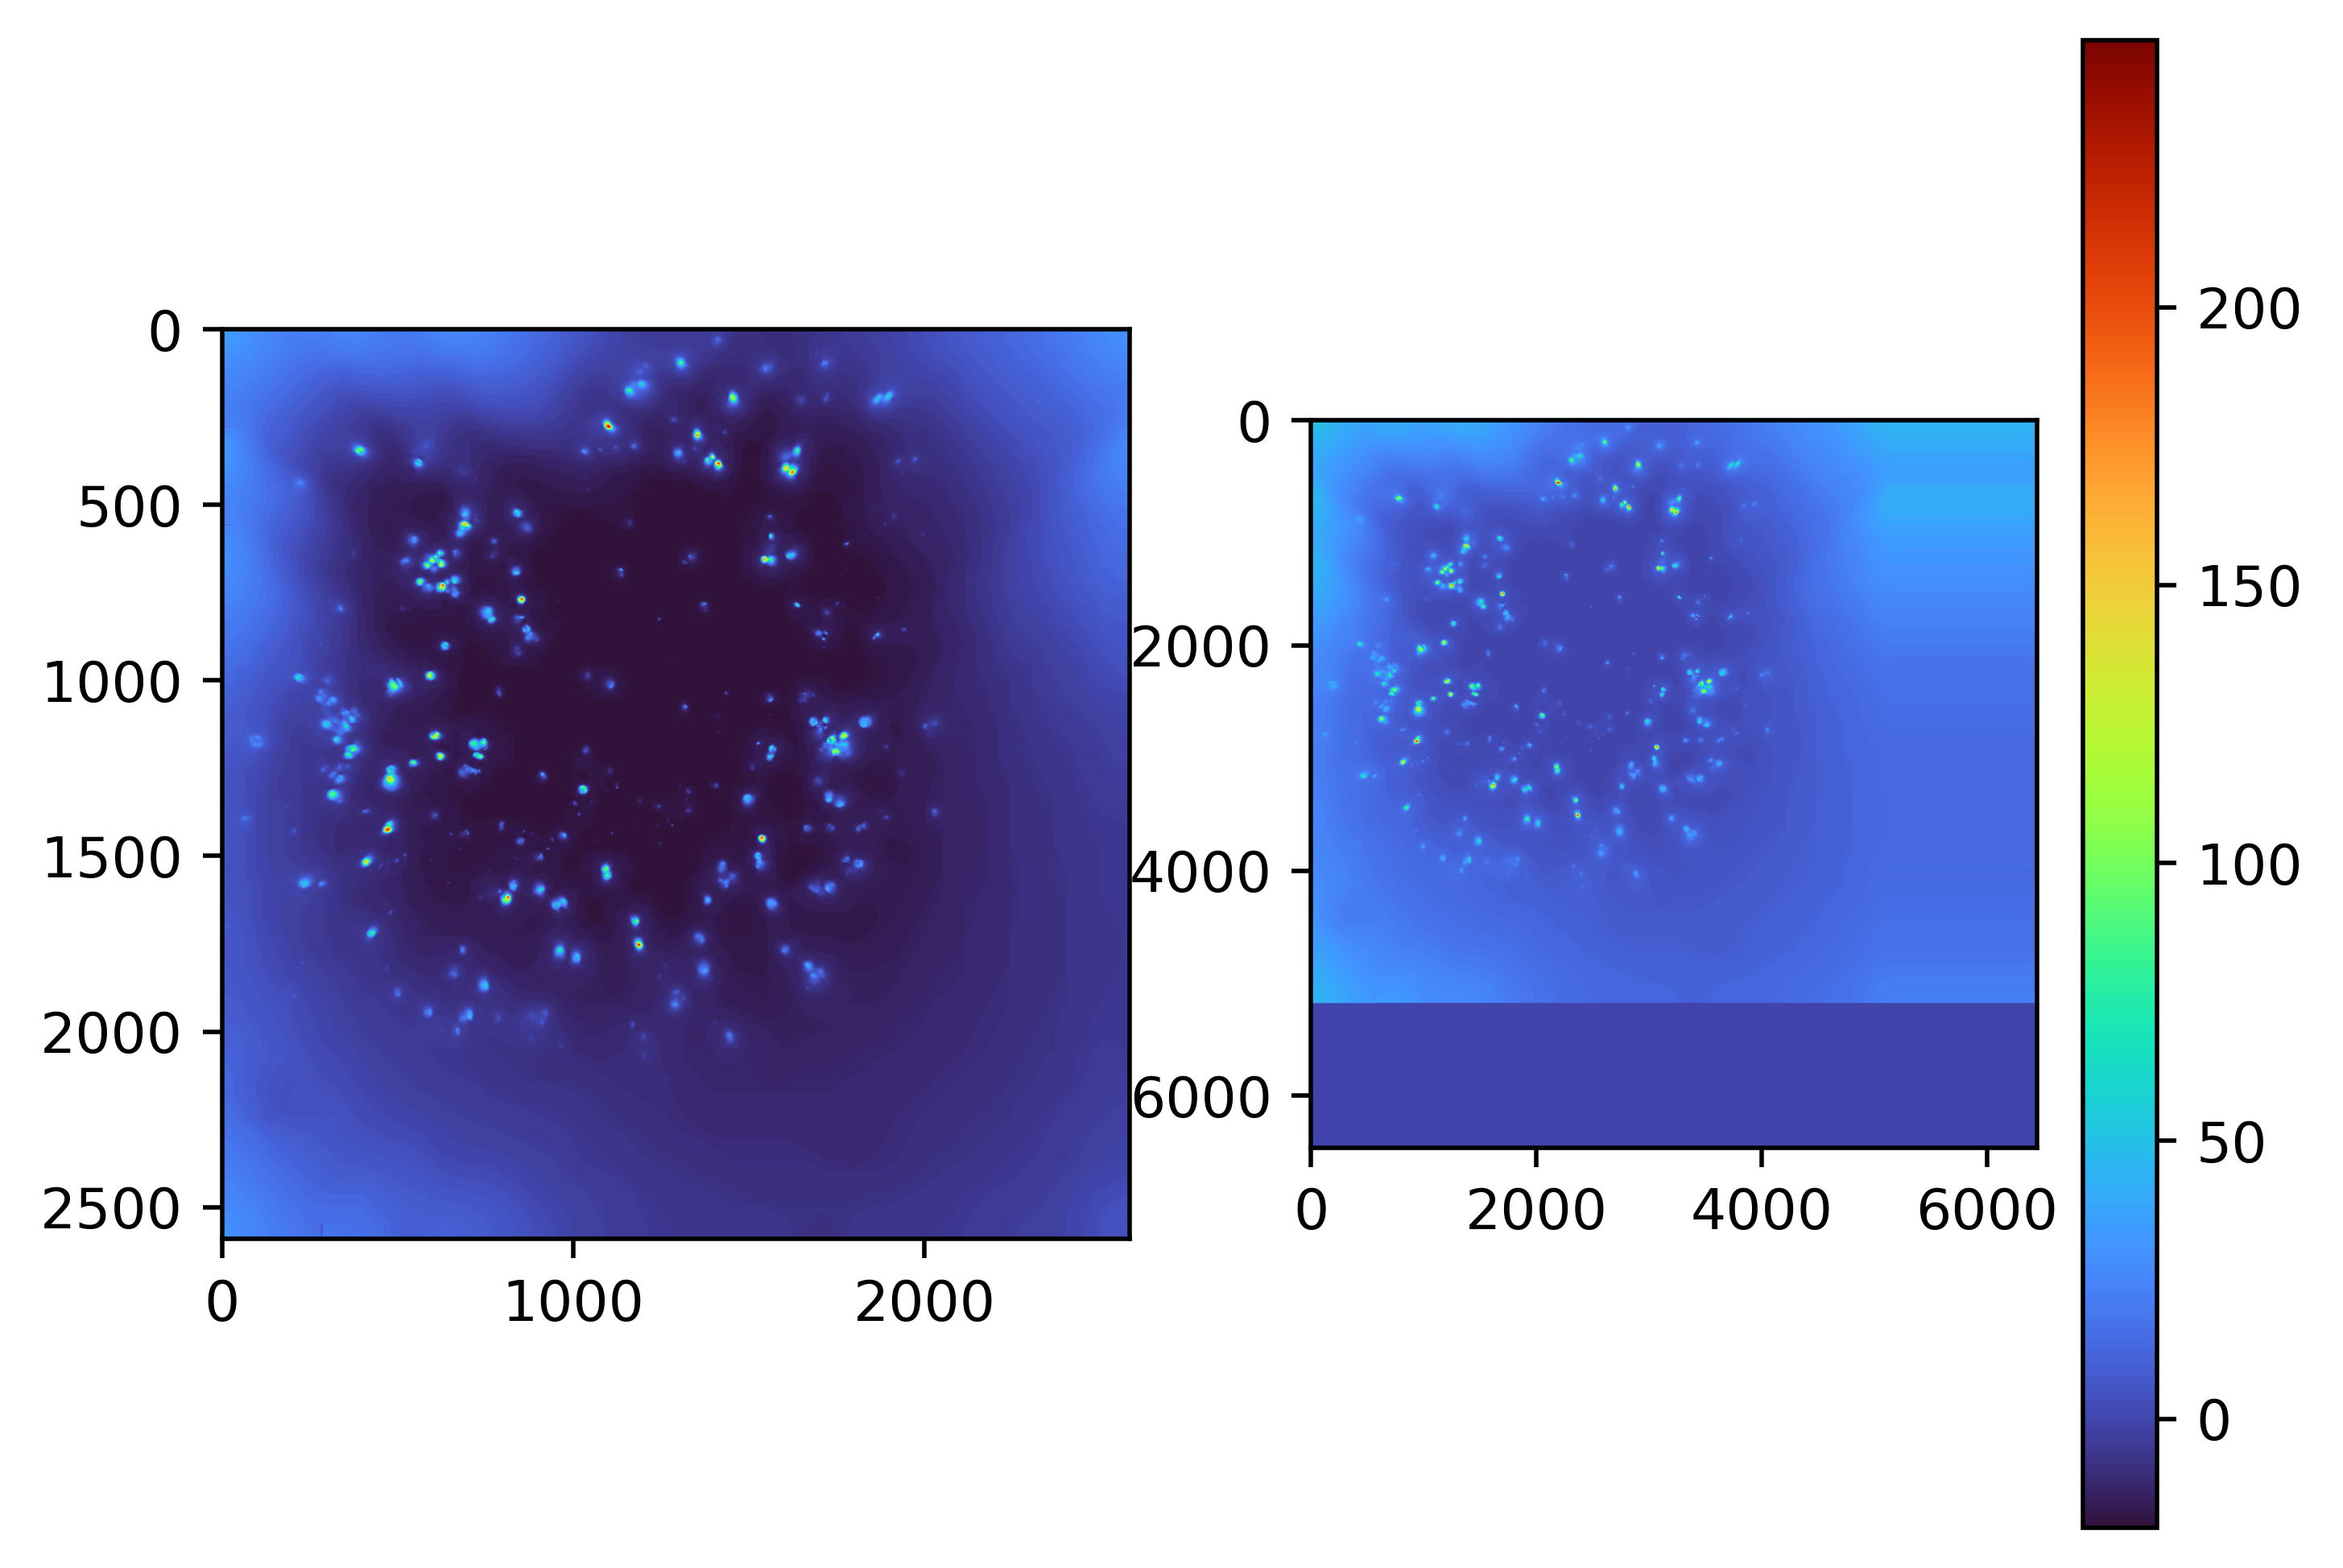

In [16]:
# I have image_1, and want to interpolate it to have the same number of pixels as padded_image

# create a grid of points
x = np.arange(0, image_1.shape[1])
y = np.arange(0, image_1.shape[0])

# create a random image

# create interpolation function
f = interpolate.interp2d(x, y, image_1, kind='cubic')

# interpolate image to have 100x100 pixels
x_new = np.arange(0, padded_image.shape[1], 0.5)
y_new = np.arange(0, padded_image.shape[0], 0.5)
image_new = f(x_new, y_new)

# plot the original and interpolated image
plt.figure(dpi=500)
plt.subplot(121)

plt.imshow(image_1, cmap='turbo')

plt.subplot(122)
plt.imshow(image_new, cmap='turbo')
plt.colorbar()
plt.show()
